In [37]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sklearn

plt.style.use("seaborn")

In [38]:
df_raw = pd.read_csv("../data/processed/data.csv", index_col = 0)

df = df_raw[df_raw.columns[1:]]
df = df.drop_duplicates()
df = df.sort_values("kreis_key").reset_index(drop=True)
df = df[["kreis_key", "kreis_name",  "income_pp_2018", "income_2018", "crimes_2018", "population_2018", "crimes_pp_2018"]]
df = df.dropna()
df.kreis_key = df.kreis_key.astype(int).astype(str).str.zfill(5)
df.income_pp_2018 = pd.to_numeric(df.income_pp_2018)

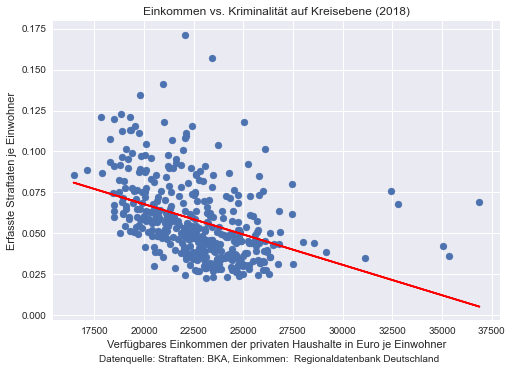

In [40]:
# income vs crimes
X = np.array(df.income_pp_2018).reshape(-1, 1)
y = df.crimes_pp_2018

regr = sklearn.linear_model.LinearRegression()
regr.fit(X, y)
y_pred = regr.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred, color ="red")

plt.title("Einkommen vs. Kriminalität auf Kreisebene (2018)")
plt.xlabel("Verfügbares Einkommen der privaten Haushalte in Euro je Einwohner")
plt.ylabel("Erfasste Straftaten je Einwohner")

plt.figtext(0.5, 0.02, "Datenquelle: Straftaten: BKA, Einkommen:  Regionaldatenbank Deutschland", ha="center", fontsize=10)

plt.savefig(os.path.join(".." , "output" ,  "crimes_vs_income_2018.png"))
